In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model
%matplotlib inline

In [2]:
data = pd.read_csv('./omnituremda2.csv')
#JB did you change anything from the original 'omnituremda' CSV?

In [3]:
data.head()

,date,site,searchengine,directentry,otherwebsites,socialnetworks,cancertypes,donated,ra
0,1/1/16,24398,16,20,1,2,110,28,57
1,1/2/16,25723,20,15,4,0,90,33,52
2,1/3/16,30018,22,18,4,1,118,21,62
3,1/4/16,52082,77,102,12,1,353,30,247
4,1/5/16,55670,78,87,7,1,350,30,242


In [4]:
data.shape
#JB this is quite small; can you find more data?

(93, 9)

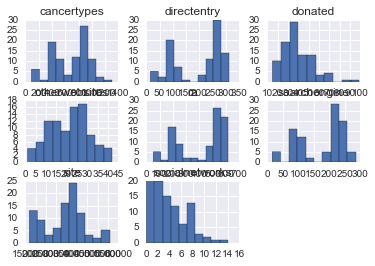

In [5]:
data.hist()
plt.show()
#JB enlarge, and label our axes!!

In [6]:
data.corr()
#JB what's of interest?

,site,searchengine,directentry,otherwebsites,socialnetworks,cancertypes,donated,ra
site,1.000000,0.460392,0.525106,0.434579,0.323692,0.479060,0.383583,0.571093
searchengine,0.460392,1.000000,0.965710,0.828317,0.590747,0.866196,0.392068,0.978897
directentry,0.525106,0.965710,1.000000,0.830758,0.599038,0.860911,0.398646,0.991921
otherwebsites,0.434579,0.828317,0.830758,1.000000,0.527521,0.749659,0.312174,0.841703
socialnetworks,0.323692,0.590747,0.599038,0.527521,1.000000,0.602143,0.164664,0.598908
cancertypes,0.479060,0.866196,0.860911,0.749659,0.602143,1.000000,0.370807,0.875027
donated,0.383583,0.392068,0.398646,0.312174,0.164664,0.370807,1.000000,0.414271
ra,0.571093,0.978897,0.991921,0.841703,0.598908,0.875027,0.414271,1.000000


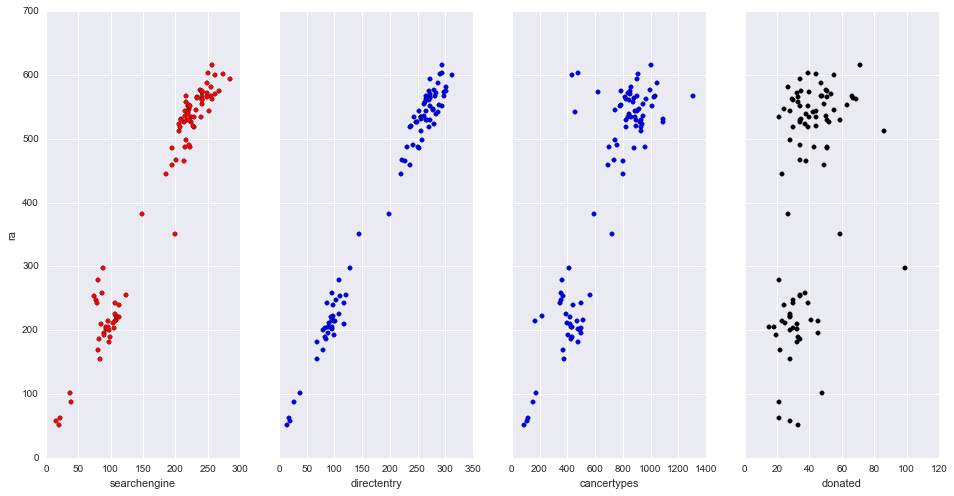

In [7]:
fig, axs = plt.subplots(1, 4, sharey=True)
data.plot(kind='scatter', x='searchengine', y='ra', ax=axs[0], figsize=(16, 8), color='r')
data.plot(kind='scatter', x='directentry', y='ra', ax=axs[1], color='b')
data.plot(kind='scatter', x='cancertypes', y='ra', ax=axs[2],color='blue')
data.plot(kind='scatter', x='donated', y='ra', ax=axs[3],color='black')
#JB anything interesting?

In [8]:
import statsmodels.formula.api as smf
X = data [['directentry']]
y = data['ra']

lm = smf.ols(formula='y ~ X', data=data).fit()
lm.summary()
#Cool, but you wanted to do a logit and random forest approach. Need to if predicting conversion. Also, bring in more features.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5564.
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           2.12e-83
Time:                        20:47:40   Log-Likelihood:                -418.67
No. Observations:                  93   AIC:                             841.3
Df Residuals:                      91   BIC:                             846.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     37.7315      5.520      6.835      0.000        26.767    48.696
X              1.8849      0.025     74.592      0.000         1.835     1.935
==============================================================================
Omnibus:                        4.573   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                2.285
Skew:                          -0.006   Prob(JB):                        0.319
Kurtosis:                       2.232   Cond. No.                         527.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""